# 如何用Python计算特征重要性

特征重要性评分是一种为输入特征评分的手段，其依据是输入特征在预测目标变量过程中的有用程度。
特征重要性有许多类型和来源，尽管有许多比较常见，比如说统计相关性得分，线性模型的部分系数，基于决策树的特征重要性和经过随机排序得到重要性得分。

特征重要性在预测建模项目中起着重要作用，包括提供对数据、模型的见解，以及如何降维和选择特征，从而提高预测模型的的效率和有效性。

在本教程中，我将会阐述用于python机器学习的特征重要性。完成本教程后，你将会知道：

- 特征重要性在预测建模中的作用
- 如何计算和查看来自线性模型和决策树的特征重要性
- 如何计算和查看随机排序重要性得分

## 1. 特征重要性

特征重要性是一种为预测模型的输入特征评分的方法，该方法揭示了进行预测时每个特征的相对重要性。

可以为涉及预测数值的问题（称为回归）和涉及预测类别标签的问题（称为分类）计算特征重要性得分。

这些得分非常有用，可用于预测建模问题中的多种情况，例如：

- 更好地理解数据
- 更好地理解模型
- 减少输入特征的数量
 

### 特征重要性得分可以帮助了解数据集
相对得分可以突出显示哪些特征可能与目标最相关，反之则突出哪些特征最不相关。这可以由一个领域专家解释，并且可以用作收集更多的或不同的数据的基础。

### 特征重要性得分可以帮助了解模型
大多数重要性得分是通过数据集拟合出的预测模型计算的。查看重要性得分可以洞悉该特定模型，以及知道在进行预测时哪些特征最重要和哪些最不重要。这是一种模型解释，适用于那些支持它的模型。

### 特征重要性可用于改进预测模型
可以使用的重要性得分来选择要删除的特征（最低得分）或要保留的特征（最高得分）。这是一种特征选择，可以简化正在建模的问题，加快建模过程（删除特征称为降维），在某些情况下，还可以改善模型的性能。

特征重要性得分可以被输入到包装器模型，如SelectFromModel或SelectKBest，以进行特征选择。

有许多方法和模型可以计算特征重要性得分。

也许最简单的方法是计算每个特征和目标变量之间的统计学相关系数。

在本教程中，我们将研究三种比较高级的特征重要性，即：

- 从模型系数得知的特征重要性。
- 决策树中的特征重要性。
- 随机排序检验中的特征重要性。

现在让我们深入了解这三个！

## 2. 准备

在深入学习之前，我们先确认我们的环境并准备一些测试数据集。

检查Scikit-Learn版本
首先，确认你已安装最新版本的scikit-learn库。这非常重要，因为在本教程中，我们我们研究的一些模型需要最新版的库。

您可以使用以下示例代码来查看已安装的库的版本：

In [1]:
# check scikit-learn version
import sklearn

In [2]:
print(sklearn.__version__)

0.22.2.post1


接下来，让我们生成一些测试数据集，这些数据集可以作为基础来证明和探索特征重要性得分。每个测试问题有五个重要特征和五不重要的特征，看看哪种方法可以根据其重要性找到或区分特征可能会比较有意思。

### 2.1 分类数据集
我们将使用`make_classification()`函数创建一个用于测试的二进制分类数据集。

数据集将包含1000个实例，且包含10个输入特征，其中五个将会提供信息，其余五个是多余的。

为了确保每次运行代码时都得到相同的实例，我们将使用假随机数种子。下面列出了创建数据集的示例。

In [3]:
# test classification dataset
from sklearn.datasets import make_classification

In [4]:
# define dataset  
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)  
# summarize the dataset  
print(X.shape, y.shape) 

(1000, 10) (1000,)


### 2.2 回归数据集

我们将使用`make_regression()`函数创建一个用于测试的回归数据集。

像分类数据集一样，回归数据集将包含1000个实例，且包含10个输入特征，其中五个将会提供信息，其余五个是多余的。

In [5]:
# test regression dataset  
from sklearn.datasets import make_regression  
# define dataset  
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)  
# summarize the dataset  
print(X.shape, y.shape)  

(1000, 10) (1000,)


## 3. 特征重要性系数

线性的机器学习能够拟合出预测是输入值的加权和的模型。

案例包括线性回归，逻辑回归，和正则化的扩展案例，如岭回归和弹性网络。

所有这些算法都是找到一组要在加权求和中使用的系数，以便进行预测。这些系数可以直接用作粗略类型的特征重要性得分。

我们来仔细研究一下分类和回归中的特征重要性系数。我们将在数据集中拟合出一个模型以找到系数，然后计算每个输入特征的重要性得分，最终创建一个条形图来了解特征的相对重要性。

### 3.1线性回归特征重要性
我们可以在回归数据集中拟合出一个LinearRegression模型，并检索coeff_属性，该属性包含为每个输入变量（特征）找到的系数。这些系数可以为粗略特征重要性评分提供依据。该模型假设输入变量具有相同的比例或者在拟合模型之前已被按比例缩放。

这种方法也可以用于岭回归和弹性网络模型。

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


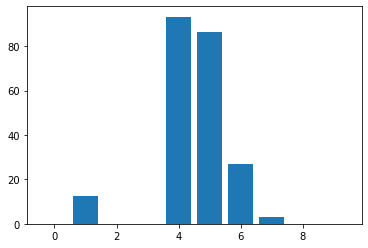

In [9]:
# linear regression feature importance  
from sklearn.datasets import make_regression  
from sklearn.linear_model import LinearRegression  
from matplotlib import pyplot  
# define dataset  
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)  
# define the model  
model = LinearRegression()  
# fit the model  
model.fit(X, y)  
# get importance  
importance = model.coef_  
# summarize feature importance  
for i,v in enumerate(importance):  
    print('Feature: %0d, Score: %.5f' % (i,v))  
# plot feature importance  
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('linear_regression_feature_importance.png')
pyplot.show()

### 3.2 Logistic回归特征重要性

就像线性回归模型一样，我们也可以在回归数据集中拟合出一个LogisticRegression模型，并检索coeff_属性。这些系数可以为粗略特征重要性评分提供依据。该模型假设输入变量具有相同的比例或者在拟合模型之前已被按比例缩放。

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


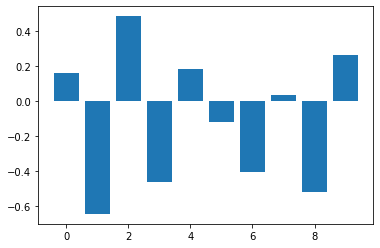

In [10]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('logistic_regression_feature_importance.png')
pyplot.show()

回想一下，这是有关0和1的分类问题。请注意系数既可以为正，也可以为负。正数表示预测类别1的特征，而负数表示预测类别0的特征。

## 4. 基于决策树的特征重要性

决策树算法，比如说classification and regression trees（CART）根据Gini系数或熵的减少来提供重要性得分。这个方法也可用于随机森林和梯度提升算法。

### 4.1 基于CART的特征重要性
对于在scikit-learn中实现的特征重要性，我们可以将CART算法用于DecisionTreeRegressor和DecisionTreeClassifier类

拟合后，模型提供feature_importances_属性，可以访问该属性以检索每个输入特征的相对重要性得分。

让我们看一个用于回归和分类的示例。

Feature: 0, Score: 0.00255
Feature: 1, Score: 0.00425
Feature: 2, Score: 0.00155
Feature: 3, Score: 0.00186
Feature: 4, Score: 0.51767
Feature: 5, Score: 0.43817
Feature: 6, Score: 0.02752
Feature: 7, Score: 0.00204
Feature: 8, Score: 0.00267
Feature: 9, Score: 0.00172


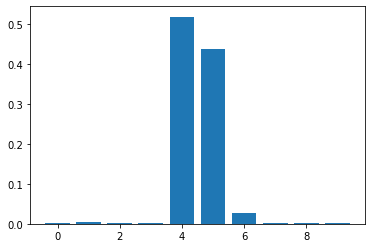

In [12]:
# 基于CART（回归）的特征重要性
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('decision_tree_regression_feature_importance.png')
pyplot.show()

Feature: 0, Score: 0.03431
Feature: 1, Score: 0.01200
Feature: 2, Score: 0.18030
Feature: 3, Score: 0.29922
Feature: 4, Score: 0.09378
Feature: 5, Score: 0.00467
Feature: 6, Score: 0.15741
Feature: 7, Score: 0.05149
Feature: 8, Score: 0.12904
Feature: 9, Score: 0.03778


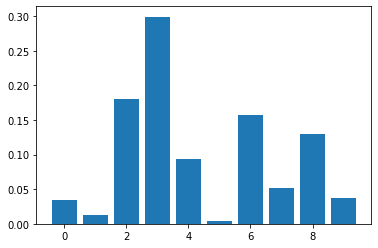

In [13]:
# 基于CART（分类）的特征重要性
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('decision_tree_classification_feature_importance.png')
pyplot.show()

### 4.2随机森林中的特征重要性

对于在scikit-learn中实现的特征重要性，我们可以将Random Forest算法用于RandomForestRegressor和RandomForestClassifier类。

拟合后，模型提供feature_importances_属性，可以访问该属性以检索每个输入特征的相对重要性得分。

这种方法也可以与装袋和极端随机树（extraTree）算法一起使用。

让我们看一个用于回归和分类的示例。

Feature: 0, Score: 0.00298
Feature: 1, Score: 0.00510
Feature: 2, Score: 0.00281
Feature: 3, Score: 0.00293
Feature: 4, Score: 0.52941
Feature: 5, Score: 0.42158
Feature: 6, Score: 0.02612
Feature: 7, Score: 0.00300
Feature: 8, Score: 0.00313
Feature: 9, Score: 0.00294


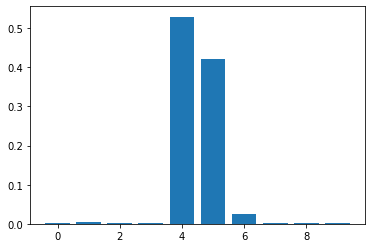

In [14]:
# 随机森林（回归）中的特征重要性
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('random_forest_regression_feature_importance.png')
pyplot.show()

Feature: 0, Score: 0.06566
Feature: 1, Score: 0.10831
Feature: 2, Score: 0.16528
Feature: 3, Score: 0.18956
Feature: 4, Score: 0.08240
Feature: 5, Score: 0.10828
Feature: 6, Score: 0.10255
Feature: 7, Score: 0.04922
Feature: 8, Score: 0.08633
Feature: 9, Score: 0.04241


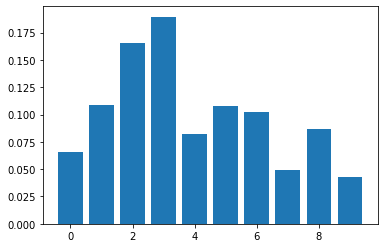

In [15]:
# 随机森林（分类）中的特征重要性
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('random_forest_classification_feature_importance.png')
pyplot.show()

### 4.3基于XGBoost的特征重要性
XGBoost是一个库，它提供了随机梯度提升算法的高效实现。可以通过XGBRegressor和XGBClassifier类将此算法与scikit-learn一起使用。

拟合后，模型提供feature_importances_属性，可以访问该属性以检索每个输入特征的相对重要性得分。

scikit-learn还通过GradientBoostingClassifier和GradientBoostingRegressor提供了该算法，并且可以使用相同的特征选择方法

首先，安装XGBoost库，例如：
```
1. sudo pip install xgboost
```
然后，通过检查版本号来确认该库已正确安装并且可以正常工作。

In [16]:
# check xgboost version
import xgboost
xgboost.__version__

/usr/local/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'1.0.2'

Feature: 0, Score: 0.00039
Feature: 1, Score: 0.00583
Feature: 2, Score: 0.00112
Feature: 3, Score: 0.00129
Feature: 4, Score: 0.49502
Feature: 5, Score: 0.46443
Feature: 6, Score: 0.02951
Feature: 7, Score: 0.00086
Feature: 8, Score: 0.00075
Feature: 9, Score: 0.00079


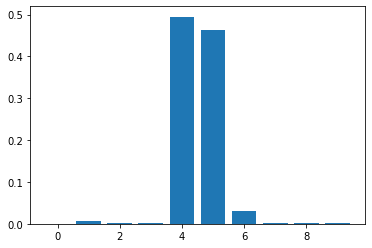

In [17]:
# 基于XGBoost（回归）的特征重要性
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('xgboost_regression_feature_importance.png')
pyplot.show()

Feature: 0, Score: 0.03723
Feature: 1, Score: 0.07725
Feature: 2, Score: 0.12537
Feature: 3, Score: 0.29666
Feature: 4, Score: 0.10099
Feature: 5, Score: 0.05706
Feature: 6, Score: 0.13027
Feature: 7, Score: 0.03537
Feature: 8, Score: 0.11694
Feature: 9, Score: 0.02285


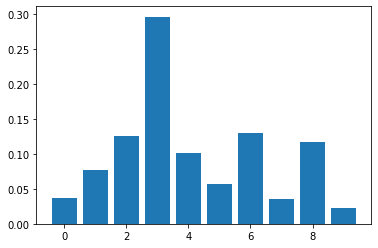

In [18]:
# 基于XGBoost（分类）的特征重要性
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('xgboost_classification_feature_importance.png')
pyplot.show()

## 5. 基于随机排序的特征重要性

随机排序特征重要性（Permutation feature importance）可以计算相对重要性，与所使用的模型无关。

首先，在数据集中拟合出一个模型，比如说一个不支持本地特征重要性评分的模型。然后，尽管对数据集中的特征值进行了干扰，但仍可以使用该模型进行预测。对数据集中的每个特征进行此操作。然后，再将整个流程重新操作3、5、10或更多次。我们得到每个输入特征的平均重要性得分（以及在重复的情况下得分的分布）。

此方法可以用于回归或分类，要求选择性能指标作为重要性得分的基础，例如回归中的均方误差和分类中的准确性。

可以通过`permutation_importance()`函数（以模型和数据集为参数）和评分函数进行随机排序特性选择。

让我们看下这个特征选择方法，其算法并不支持特征选择，尤其是k近邻算法（ k-nearest neighbors）。

Feature: 0, Score: 127.32844
Feature: 1, Score: 269.25869
Feature: 2, Score: 185.71310
Feature: 3, Score: 55.17118
Feature: 4, Score: 9505.84555
Feature: 5, Score: 8006.96410
Feature: 6, Score: 905.83999
Feature: 7, Score: 156.80188
Feature: 8, Score: 156.68583
Feature: 9, Score: 99.63719


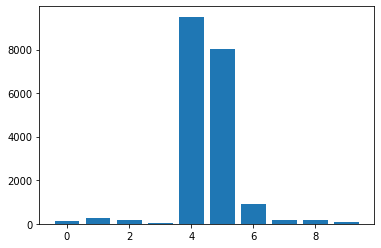

In [19]:
# 随机排序（回归）特征重要性
# 下面列出了拟合KNeighborsRegressor并且计算特征重要性得分的完整示例。
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('permutation_knn_regression_feature_importance.png')
pyplot.show()

Feature: 0, Score: 0.05580
Feature: 1, Score: 0.06280
Feature: 2, Score: 0.05120
Feature: 3, Score: 0.09060
Feature: 4, Score: 0.04780
Feature: 5, Score: 0.05780
Feature: 6, Score: 0.07340
Feature: 7, Score: 0.05140
Feature: 8, Score: 0.05460
Feature: 9, Score: 0.02960


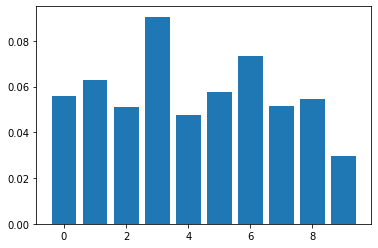

In [20]:
# 随机排序（分类）特征重要性
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.savefig('permutation_knn_classification_feature_importance.png')
pyplot.show()

In [21]:
help(permutation_importance)

Help on function permutation_importance in module sklearn.inspection._permutation_importance:

permutation_importance(estimator, X, y, scoring=None, n_repeats=5, n_jobs=None, random_state=None)
    Permutation importance for feature evaluation [BRE]_.
    
    The :term:`estimator` is required to be a fitted estimator. `X` can be the
    data set used to train the estimator or a hold-out set. The permutation
    importance of a feature is calculated as follows. First, a baseline metric,
    defined by :term:`scoring`, is evaluated on a (potentially different)
    dataset defined by the `X`. Next, a feature column from the validation set
    is permuted and the metric is evaluated again. The permutation importance
    is defined to be the difference between the baseline metric and metric from
    permutating the feature column.
    
    Read more in the :ref:`User Guide <permutation_importance>`.
    
    Parameters
    ----------
    estimator : object
        An estimator that has alr

## 总结
在本教程中，您知道了在Python机器学习中的特征重要性得分。

具体来说，您了解到：

- 特征重要性在预测建模问题中的作用

- 如何从线性模型和决策树中计算和查看特征重要性

- 如何计算和查看随机排序特征重要性得分